## Random Forest

In [11]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [4]:
data = load_iris()
df = pd.DataFrame(data["data"], columns= ["SL", "SW", "PL", "PW"])
df["target"] = data["target"]
df.head()

,SL,SW,PL,PW,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
xtr, xts, ytr, yts = train_test_split(df[["SL", "SW", "PL", "PW"]], df["target"], test_size= .1)

In [14]:
model = RandomForestClassifier(n_estimators=10)
model.fit(xtr, ytr)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
model.estimators_[:5]

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1575416486, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=524028626, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, m

In [16]:
for i in range(len(model.estimators_)):
    tree.export_graphviz(model.estimators_[i], 
                         out_file=f"rf{i}.dot", 
                         feature_names=["SL", "SW", "PL", "PW"], 
                         class_names=["Setosa", "Versicolor", "Virginica"])

In [17]:
model.predict(xts)

array([2, 1, 2, 0, 1, 2, 2, 1, 2, 0, 2, 1, 2, 0, 2])

#### Comparing Prediction x Actual

In [18]:
model.predict([xts.iloc[0]])[0]

2

In [19]:
yts.loc[xts.iloc[0].name]

2

In [20]:
model.score(xts, yts)

0.9333333333333333

In [21]:
model.feature_importances_

array([0.13627487, 0.02226328, 0.37729142, 0.46417043])

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yts, model.predict(xts))
cm

array([[3, 0, 0],
       [0, 4, 1],
       [0, 0, 7]])

In [23]:
cm = pd.DataFrame(cm,
                 columns= ["Pred 0", "Pred 1", "Pred 2"],
                 index= ["Actual 0", "Actual 1", "Actual 2"])
cm

,Pred 0,Pred 1,Pred 2
Actual 0,3,0,0
Actual 1,0,4,1
Actual 2,0,0,7


In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(yts, model.predict(xts))

0.9333333333333333

In [25]:
from sklearn.metrics import roc_auc_score, roc_curve

##### Probability Setosa

In [26]:
model.predict_proba(xts)[:,0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.])

##### Probibility Versicolor

In [27]:
model.predict_proba(xts)[:,1]

array([0.2, 1. , 0. , 0. , 0.6, 0. , 0. , 1. , 0. , 0. , 0.1, 0.7, 0. ,
       0. , 0. ])

##### Probability Virginica

In [28]:
model.predict_proba(xts)[:,2]

array([0.8, 0. , 1. , 0. , 0.4, 1. , 1. , 0. , 1. , 0. , 0.9, 0.3, 1. ,
       0. , 1. ])

In [30]:
fpr0, tpr0, th0 = roc_curve(yts, model.predict_proba(xts)[:,0], pos_label=0)
fpr1, tpr1, th1 = roc_curve(yts, model.predict_proba(xts)[:,1], pos_label=1)
fpr2, tpr2, th2 = roc_curve(yts, model.predict_proba(xts)[:,2], pos_label=2)

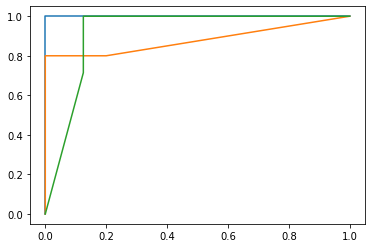

In [32]:
import matplotlib.pyplot as plt
plt.plot(fpr0, tpr0)
plt.plot(fpr1, tpr1)
plt.plot(fpr2, tpr2)
plt.show()

In [33]:
roc_auc_score(np.array(yts.tolist()), model.predict_proba(xts), labels = [0,1,2], multi_class="ovo")

0.9404761904761904